# Part I - Exploratory Data Analysis - 201902 -Fordgobike Dataset
## by (Iyanuloluwa Adewuyi)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
%matplotlib inline

In [3]:
#load the dataset
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
def dataframe_information(bikes):
    
    """Dataframe_information:
     
      reveals the basic information about the dataset.
      This information include the first three rows of data, shape, statistics,  null values etc
      
      """
    
    first_three_rows = bikes.head(2)
    
    dataframe_size = bikes.shape
    
    describe_data = bikes.info()
    
    data_statistics = bikes.describe()
    
    columns = bikes.columns
    
    duplicate_data = bikes.duplicated().sum
    
    null_data = bikes.isnull().any().any()

    return first_three_rows, dataframe_size, describe_data, data_statistics, columns, duplicate_data, null_data

bikes_details = dataframe_information(bikes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
bikes_details[0]

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   

                 end_station_name  end_station_latitude  \
0  Commercial St at Montgomery St             37.794231   
1              Berry St at 4th St             37.775880   

   end_station_longitude  bike_id user_type  member_birth_year member_gender  \
0            -122.402923     4902  Customer             1984.0          Male   
1            -122.393170     2535  Customer                NaN           NaN   

  bike_share_for_all_trip  
0                      No  
1                      No

In [6]:

bikes_details[1]

(183412, 16)

In [7]:
bikes_details[3]

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [8]:
bikes_details[5]

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
183407    False
183408    False
183409    False
183410    False
183411    False
Length: 183412, dtype: bool>

In [9]:
bikes_details[6]

True

In [10]:
#dropping the null values
bikes.dropna(inplace = True)
bikes.reset_index(inplace = True)

In [11]:
bikes.isnull().sum()

index                      0
duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [12]:
#Create  age column
bikes['member_age'] = 2019-bikes['member_birth_year'].astype('int')

In [13]:
bikes['member_age'].max()

141

In [14]:

#remove outliers in age
age_outliers = bikes[bikes['member_age'] > 80]
bikes= bikes.drop(age_outliers.index, axis=0)

In [15]:
bikes['member_age'].max()

80

In [16]:
bikes.shape

(174760, 18)

In [17]:

#changing the start time and end time to datetime
bikes['start_time'] = pd.to_datetime(bikes['start_time'])
bikes['end_time'] = pd.to_datetime(bikes['end_time'])

In [18]:
#change duration_sec to minutes
bikes['duration_min'] = bikes['duration_sec'] / 60

In [19]:
# extract start time weekdays
bikes['start_time_weekday']=bikes['start_time'].dt.strftime('%a')

In [20]:
bikes.head(2)

index  duration_sec              start_time                end_time  \
0      0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1      2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              86.0                           Market St at Dolores St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.769305              -122.426826             3.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1  Powell St BART Station (Market St at 4th St)             37.786375   

   end_station_longitude  bike_id user_type  member_birth_year member_gender  \
0            -122.402923     4902  Customer             1984.0          Male   
1            -122.404904     5905  Customer             1972.0          Male   

  bike_share_for_all_trip  member_age  duration_min start_time_weekday  
0                      No          35        869.75                Thu  
1                      No          47       1030.90                Thu

In [21]:
#using the latitudes and longitudes to calculate the distance
import math
def distance(start_station, stop_station):
    lat1, lon1 = start_station
    lat2, lon2 = stop_station
    radius = 6371 # km
    latdist = math.radians(lat2-lat1)
    longdist= math.radians(lon2-lon1)
    a = math.sin(latdist/2) * math.sin(latdist/2) + math.cos(math.radians(lat1)) \
* math.cos(math.radians(lat2)) * math.sin(longdist/2) * math.sin(longdist/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

In [22]:
bikes['distance_km'] = bikes.apply(lambda n: distance([n['start_station_longitude'],n['start_station_latitude']],
                            [n['end_station_longitude'],n['end_station_latitude']]), axis=1)

In [23]:
bikes['distance_km'].describe()

count    174760.000000
mean          1.479397
std           1.038284
min           0.000000
25%           0.770978
50%           1.199211
75%           1.939512
max          63.800190
Name: distance_km, dtype: float64

In [24]:
#remove distance outliers
distance_outliers = bikes[(bikes['distance_km'] > 6) | (bikes['distance_km'] < 0.1)]
bikes= bikes.drop(distance_outliers.index, axis=0)

In [25]:
bikes['distance_km'].min()

0.10237087198714653

### What is the structure of your dataset?

> The dataset contains about 183,412 observations with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Most of these features are numerical variables while some ( for example, member_gender, user_type) are categorical.

### What is/are the main feature(s) of interest in your dataset?

> My keen interest is in the features that gives deep insights about the trips 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The days of the week when most trips are taken, the type of users , the gender, the age of the members and the distance covered are possible features that can give insights into the analysis and help make decisions

## Univariate Exploration

> I will start by looking at the main variable which is the time of trip (i.e duration_sec)
> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.



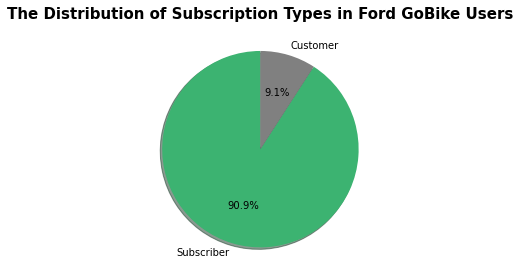

In [26]:
#The Distribution of Subscription Types in Ford GoBike Users
users = bikes['user_type'].value_counts()
colors = ['#3CB371', '#808080']
plt.pie(users, labels=users.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("The Distribution of Subscription Types in Ford GoBike Users", fontsize=15, y=1.07, fontweight='semibold')
plt.axis('square');

> 90.5% of the users were subscribers while 9.5% of them were customers.

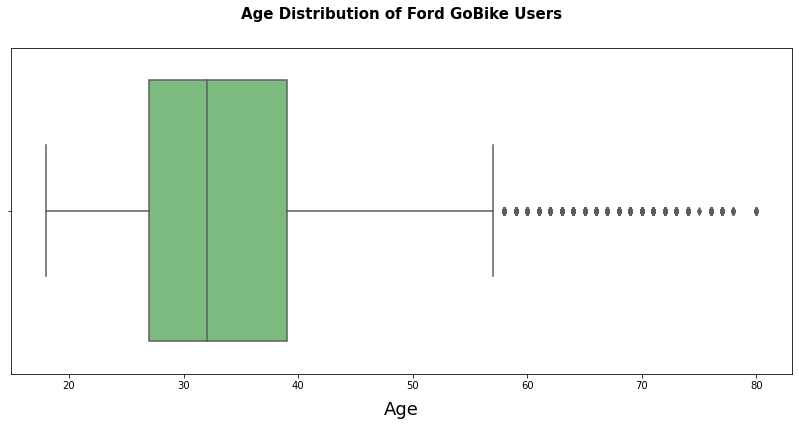

In [27]:
#Age Distribution of Ford GoBike Users
plt.figure(figsize=(14,6))
sns.boxplot(x='member_age', data=bikes, palette='Greens')
plt.title("Age Distribution of Ford GoBike Users", fontsize= 15, y=1.07, fontweight='semibold')
plt.xlabel("Age", fontsize=18, labelpad=10);

> The above boxplot revealed that most riders lies between the ages of 28 -40.  Bulk of the riders are 32 years of age.

In [28]:
bikes.member_age.describe()

count    170951.000000
mean         34.122561
std           9.840515
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          80.000000
Name: member_age, dtype: float64

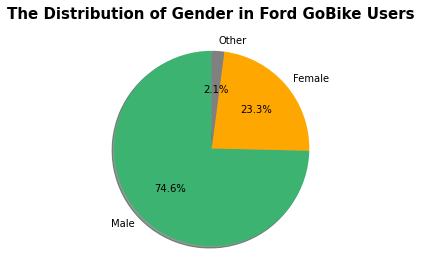

In [29]:
#The Distribution of Gender in Ford GoBike Users
gender = bikes['member_gender'].value_counts()
colors = ['#3CB371', '#FFA701' ,'#808080']
explode = (0, 0,0)
fig1, ax1 = plt.subplots()
ax1.pie(gender, explode=explode, labels=gender.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("The Distribution of Gender in Ford GoBike Users", fontsize=15, y=1.07,fontweight='semibold')
plt.axis('square');

Based on the chart above, 74.6% of the users are male, 23.3% of them are female while others are 2.1% 

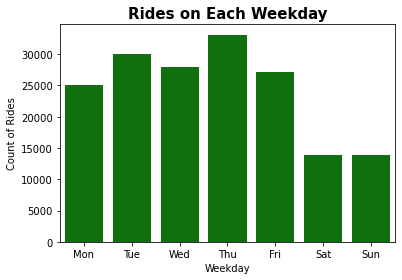

In [30]:
# Checking the rides on weekdays
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sns.countplot(data = bikes, x = 'start_time_weekday', order = order,  color="green")
plt.title('Rides on Each Weekday', fontsize = 15, fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Count of Rides');

> It can be seen that most trips were taken on Thursdays, followed by Tuesdays. General overview of the chart shows that more trips were taken on weekdays compared to weekend

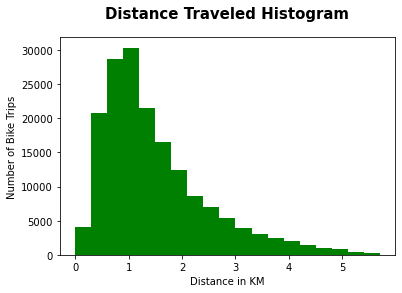

In [31]:
#plotting a histogram to show the distribution of the distance variable
bin_edges = np.arange(0, 6, 0.3)
plt.hist(data = bikes, x = 'distance_km', bins = bin_edges,  color="green")
plt.title("Distance Traveled Histogram", y = 1.06, fontsize = 15, fontweight='semibold')
plt.xlabel('Distance in KM')
plt.ylabel('Number of Bike Trips');

> The histogram above clearly shows that the distance variable is positively skewed. Most of the distance covered were between 0.5km to 2km.

In [32]:
bikes.distance_km.describe()

count    170951.000000
mean          1.500083
std           0.990158
min           0.102371
25%           0.792401
50%           1.218264
75%           1.953678
max           5.987352
Name: distance_km, dtype: float64

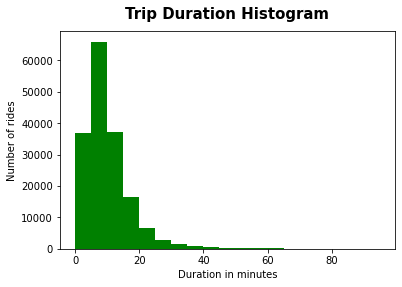

In [33]:
#Checking the distribution of the duration
bin_edges = np.arange(0, 100, 5)

plt.hist(data = bikes, x = 'duration_min', bins = bin_edges, color="green")
plt.title("Trip Duration Histogram", y=1.03, fontsize=15, fontweight='semibold')
plt.xlabel('Duration in minutes')
plt.ylabel('Number of rides');

In [34]:
bikes['duration_min'].describe()

count    170951.000000
mean         11.338127
std          25.572450
min           1.016667
25%           5.383333
50%           8.450000
75%          12.950000
max        1409.133333
Name: duration_min, dtype: float64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I discovered that there were lots of outliers and missing values. I had to remove them. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The duration_sec and the age features are postively skewed. I removed the null values for me to have high quality data

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Text(0.5, 1.03, 'Weekday Usage of the Bikeshare System by User Type')

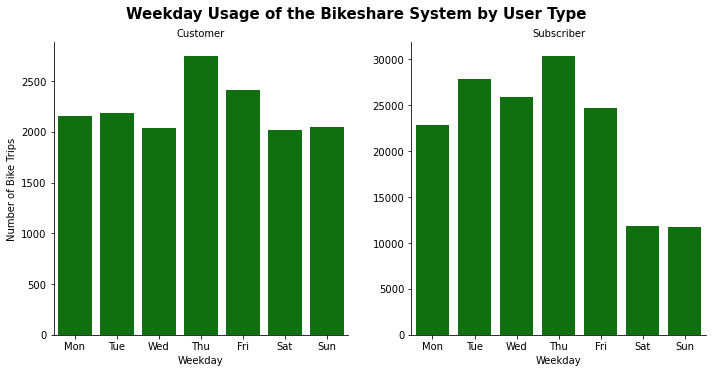

In [35]:
# Checking the weekday usage of the bikeshare system for each user type
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
bi1= sns.catplot(data=bikes, x='start_time_weekday', col="user_type", kind='count', sharey = False, order = order, color = 'green')
bi1.set_axis_labels("Weekday", "Number of Bike Trips")
bi1.set_titles("{col_name}")
bi1.fig.suptitle('Weekday Usage of the Bikeshare System by User Type', y=1.03, fontsize=15, fontweight='semibold')

> It can be seen that both customers and subscribers took trips mostly on Thursday. However, for the customers, Friday was their next peak day. But for subscribers, Tuesday was their next peak day

Text(0.5, 1.03, 'Distance covered by User Type')

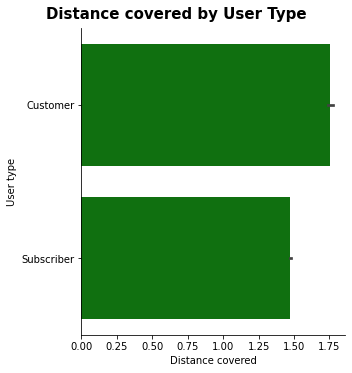

In [36]:
#looking at the user types that covered most distance
bi2= sns.catplot(data=bikes, x='distance_km', y="user_type", kind='bar', sharey = False, color = 'green', orient = 'h')
bi2.set_axis_labels("Distance covered", "User type")
bi2.set_titles("{col_name}")
bi2.fig.suptitle('Distance covered by User Type', y=1.03, fontsize=15, fontweight='semibold')

> Customers covered more distance.

<Figure size 1080x504 with 0 Axes>

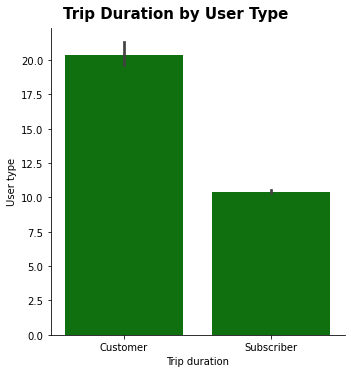

In [37]:
# looking at the type of users with average trip duration
plt.figure(figsize = (15,7))
bi3 = sns.catplot(x = "user_type", y = "duration_min", data = bikes, kind = 'bar', color = 'green')
bi3.set_axis_labels("Trip duration", "User type")
bi3.set_titles("{col_name}")
bi3.fig.suptitle('Trip Duration by User Type', y=1.03, fontsize=15, fontweight='semibold');

> Average trip duration was taken by customers.

Text(0.5, 1.03, 'Regression plot showing the relationship between duration minutes and distance')

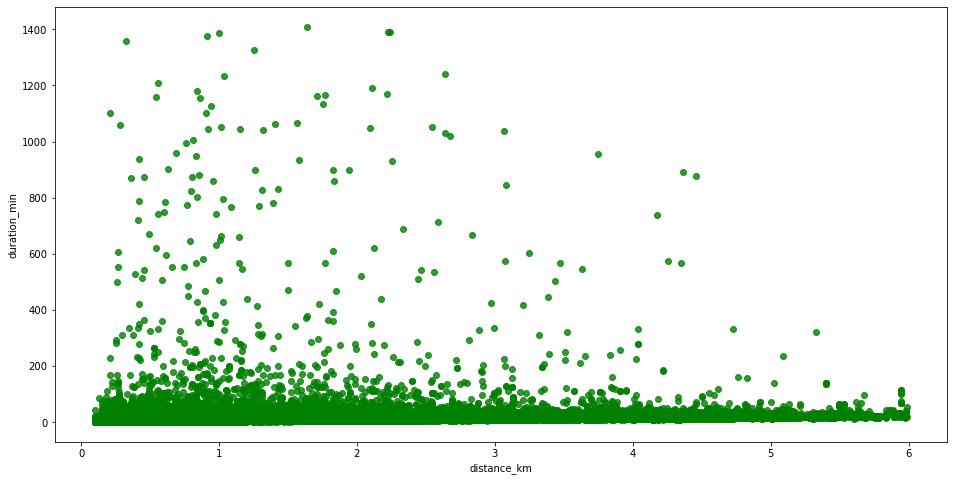

In [38]:
#looking at the relationship between duration minutes and distance
plt.figure(figsize = (16,8))
bi3= sns.regplot(data=bikes, x='distance_km', y="duration_min", color = 'green')
bi2.set_axis_labels("Distance covered", "duration_min")
bi2.set_titles("{col_name}")
bi2.fig.suptitle('Regression plot showing the relationship between duration minutes and distance', y=1.03, fontsize=15, fontweight='semibold')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The average duration of trips does not depend on the type of user. It is not dependent of whether the user is a customer or a subscriber. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The duration minutes and distance covered are somewhat positively correlated, although it is not a strong one.

## Multivariate Exploration



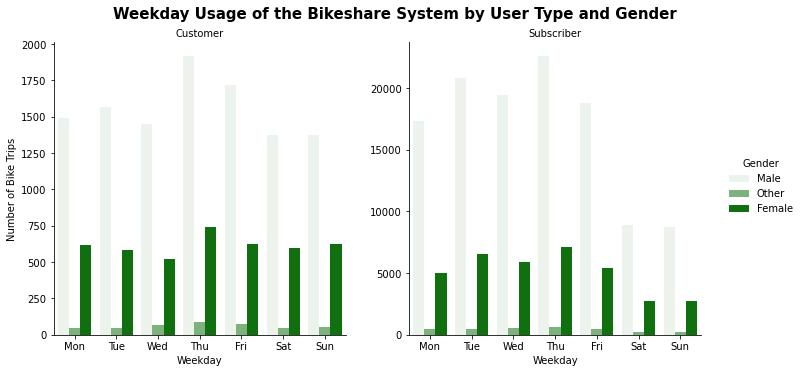

In [39]:
# Checking the weekday usage of the trips by user type and gender
order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
mu2= sns.catplot(data=bikes, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = order, color = 'green')
mu2.set_axis_labels("Weekday", "Number of Bike Trips")
mu2._legend.set_title('Gender')
mu2.set_titles("{col_name}")
mu2.fig.suptitle('Weekday Usage of the Bikeshare System by User Type and Gender', y=1.03, fontsize=15, fontweight='semibold');

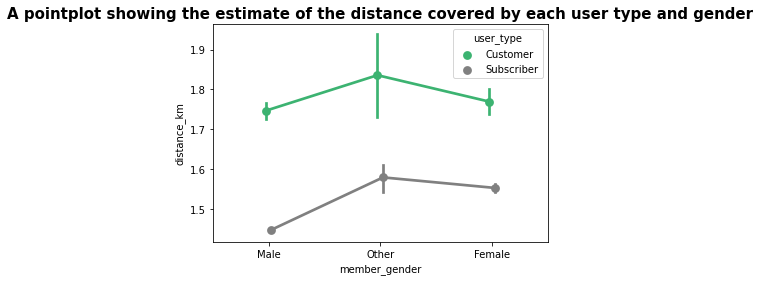

In [40]:
# Distance covered by gender and users
colors = ['#3CB371', '#808080']
plt.title('A pointplot showing the estimate of the distance covered by each user type and gender', fontsize=15, fontweight='semibold')
sns.pointplot(data=bikes, x="member_gender", y="distance_km", hue="user_type", palette = colors, dodge=True);

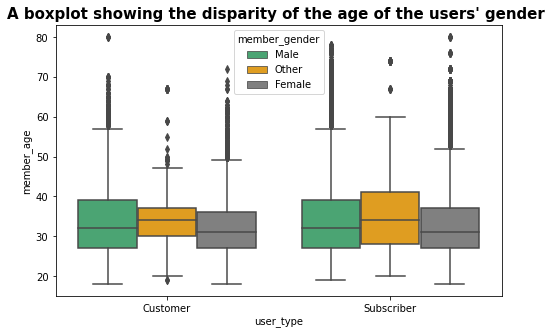

In [41]:
# Checking the disparity between variables
fig,ax1 = plt.subplots(figsize = (8,5))
colors = ['#3CB371', '#FFA701' ,'#808080']
plt.title("A boxplot showing the disparity of the age of the users' gender ", fontsize=15, fontweight='semibold')
sns.boxplot (ax = ax1, x = 'user_type', y = 'member_age', hue = 'member_gender', data = bikes, palette = colors );

> Male customers were mostly 32 years, female customers were 31 years while others are 35 years. Looking at the subscribers, the same thing is applicable to them, except that other subscribers were much considering the boxplot


<AxesSubplot:title={'center':'A Heatmap showing the relationship between variables'}>

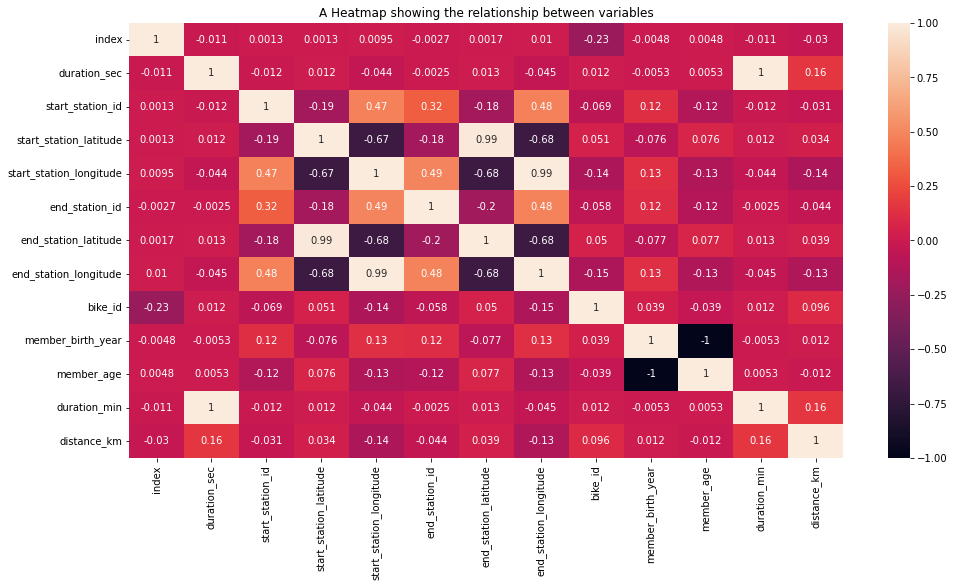

In [42]:
#Checking the relationship between variables
plt.figure(figsize = (16,8))
plt.title('A Heatmap showing the relationship between variables')
sns.heatmap(bikes.corr(), annot = True)

<Figure size 1152x576 with 0 Axes>

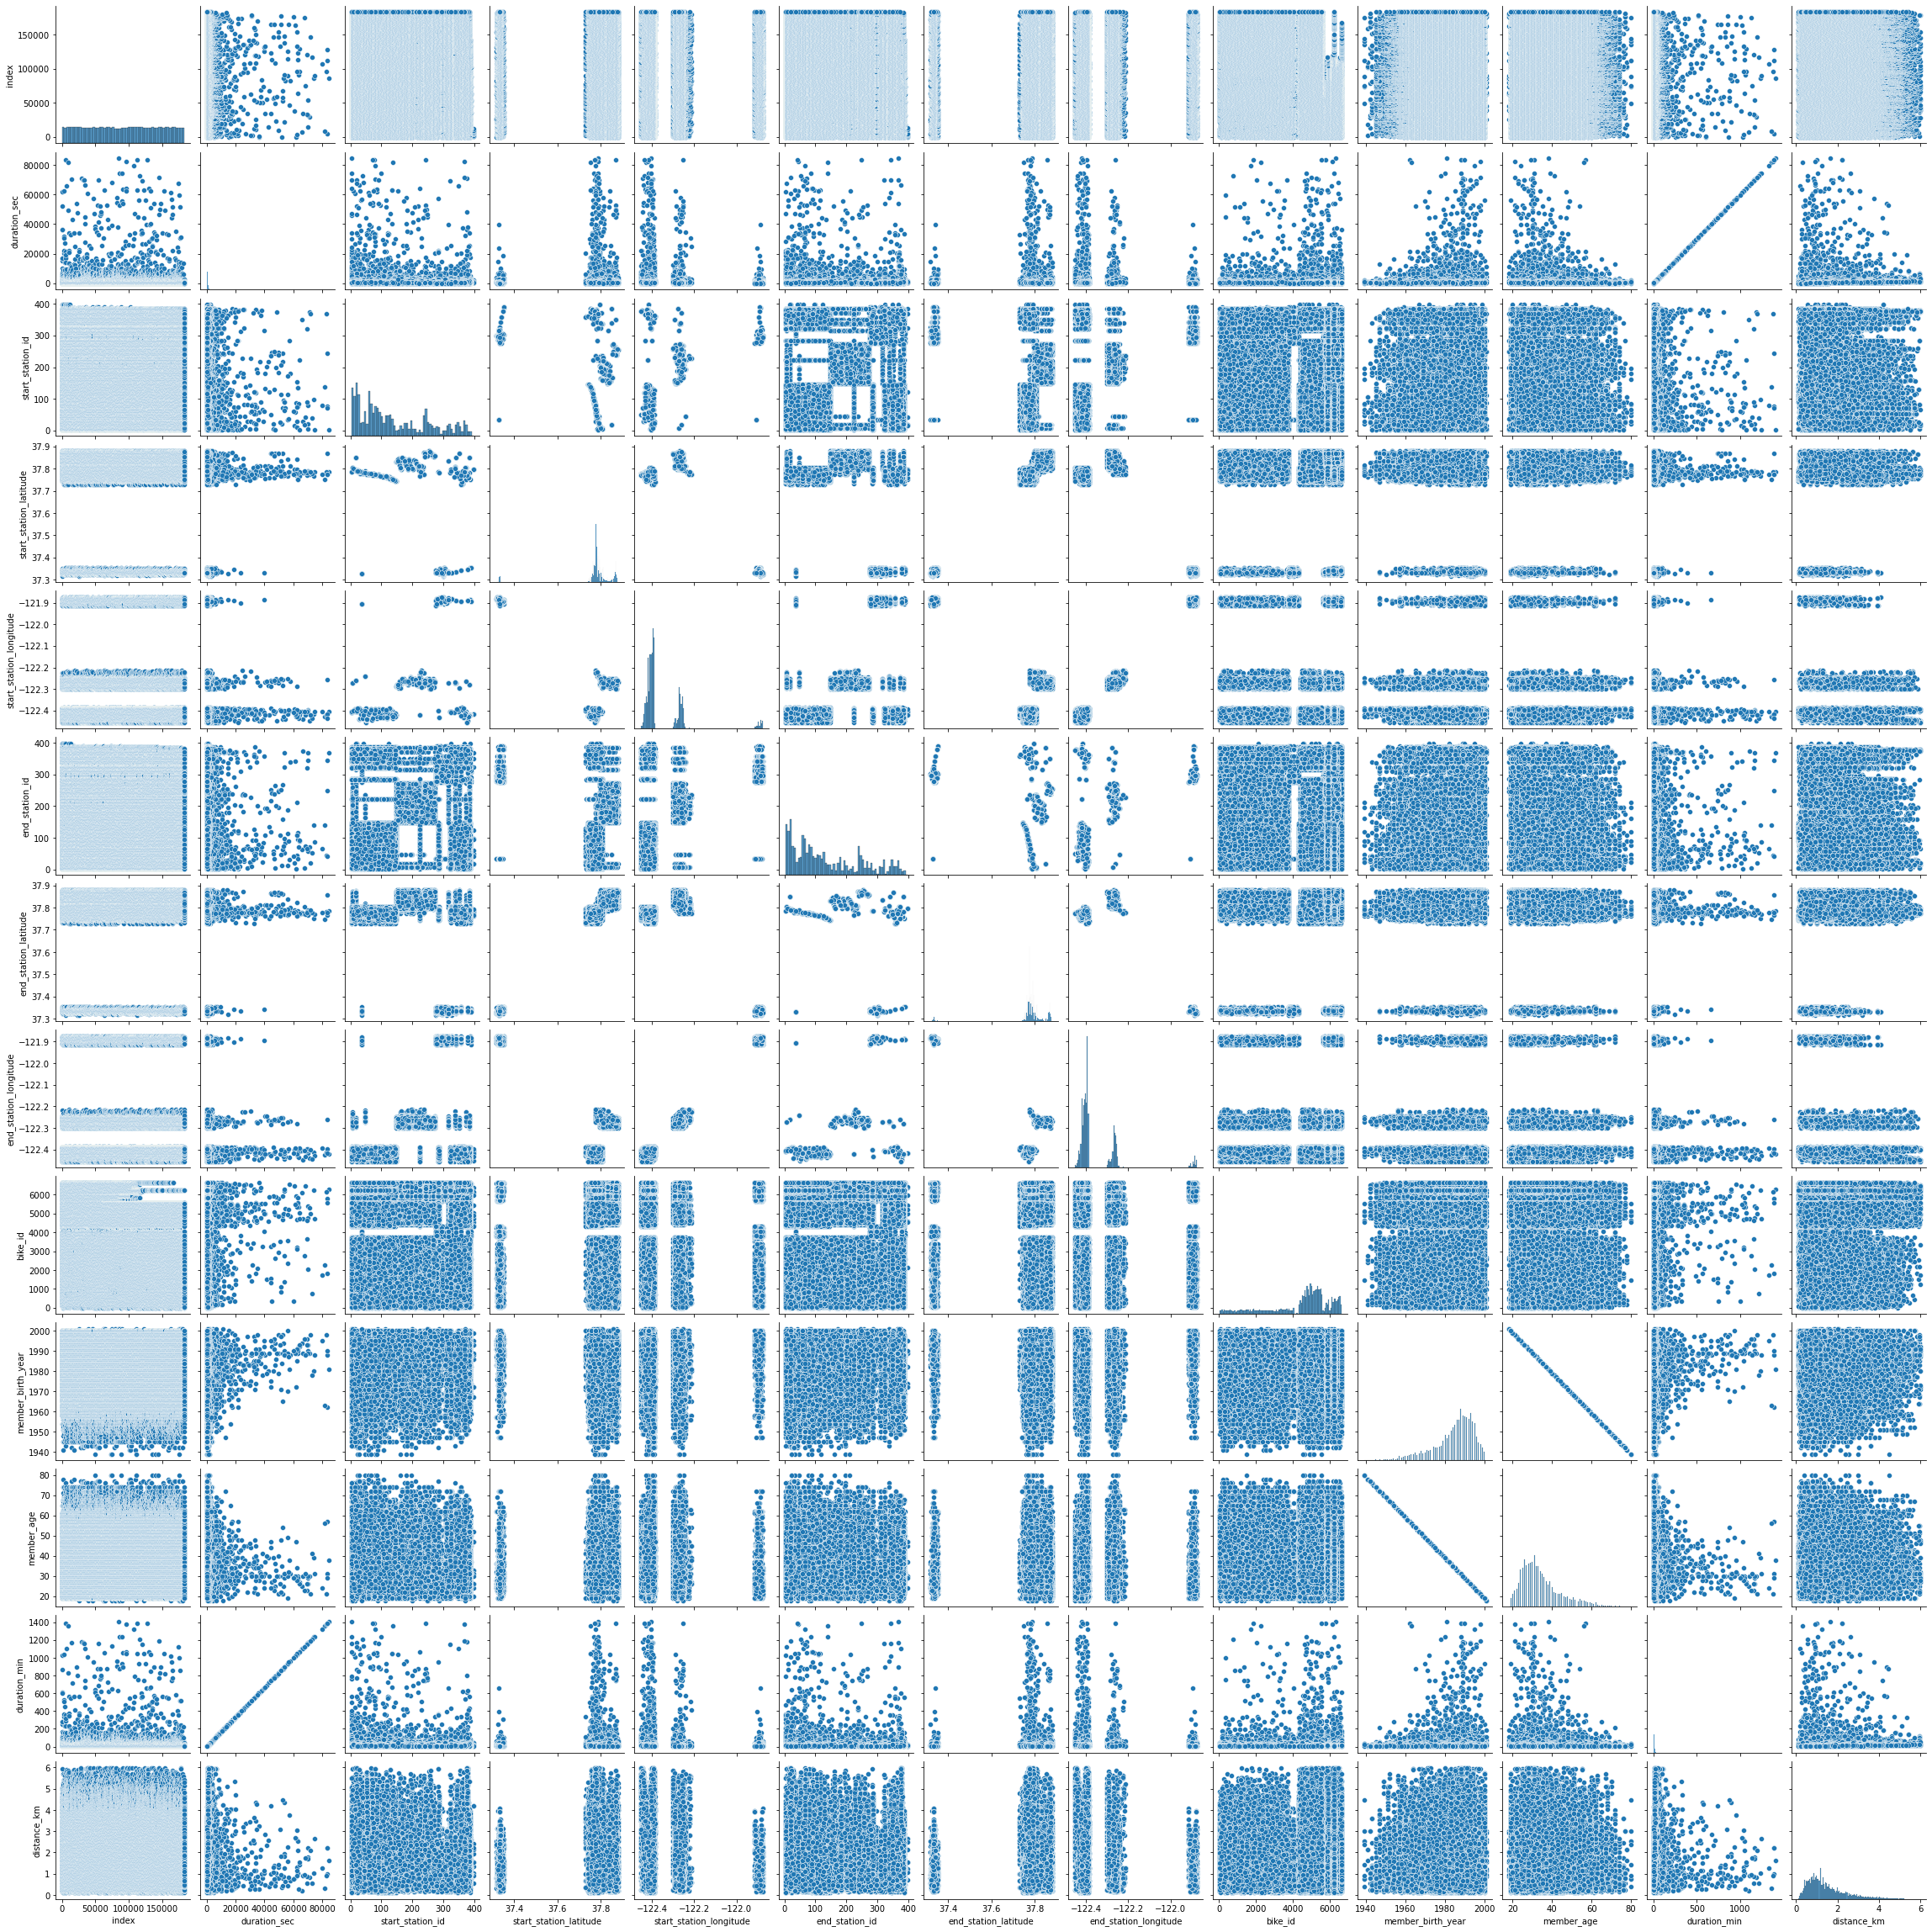

In [45]:
plt.figure(figsize = (16,8))
sns.pairplot(data = bikes, palette = 'green')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The latitudes and longitudes of both the start and end stations show  some form of correlation. This could mean that perhaps most of the trips were somewhat taken within short distances. 

### Were there any interesting or surprising interactions between features?

> The distance covered were short distances, hence the duration minutes were short.

## Conclusions
>It can be seen that there are several factors that can be considered when looking at how trips are being shared. The type of users, the distance covered and the duration minutes are some contigent features to look at. The duration of trips were not up to an hour (60 minutes).

> Another thing is that subscribers seemed to be more than customers in terms of count, however, the average trip that was taken was by customers.


## Limitations

> There were no special features to distinguish a customer and a subscriber. In other words, the attributes of both user types were not included. 

In [46]:
#Saving the new dataset for part 2 of the analysis
bikes.to_csv('bikes_new.csv', index = False)